In [20]:
import gym
import numpy as np
import random
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5


In [2]:
env = gym.make('Taxi-v2').env
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
env.reset()
env.render()

print('Action Space {}'.format(env.action_space))

print('State Space {}'.format(env.observation_space))


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [5]:

state = env.encode(4,1,2,0)
print("State : ",state)


State :  428


In [7]:
#intialize the Q-Table with Zeros 
q_table= np.zeros([env.observation_space.n,env.action_space.n])
q_table


array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [8]:
#Hyparameters
gamma  = 0.9
alpha = 0.1 #learning rate

epsilon = 0.1
max_epsilon=1.0
min_epsilon=0.01
decay_rate = 0.01

all_epochs = []
all_penalities=[]
penalities=0

In [19]:
epsilons= []
for i in range(1,1000):
    state = env.reset()
    
    epochs, penalites,reward = 0,0,0
    done = False
    
    while not done:
        if random.uniform(0,1)<epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        
        next_state,reward,done,info = env.step(action)
        
        
        next_max = np.max(q_table[next_state])
        
        q_table[state,action] =  q_table[state,action]
                                        + alpha * ( reward + gamma * 
                                         next_max - q_table[state,action])
       
        
        if reward == -10:
            penalities +=1
        
        state = next_state
        epochs +=1
    epsilon= min_epsilon +(max_epsilon-min_epsilon) * np.exp(-0.1*epsilon)
    epsilons.append(epsilon)
    if i%100==0:
        clear_output(wait=True)
        print('Episode: {}'.format(i))

print('Training Finished..')

Episode: 900
Training Finished..


In [24]:
episodes=[]

penalites=0
total_epochs , total_penalities =0,0
episode = 1000
rewards=[]
for _ in range(episode):
    start= time.time()
    state = env.reset()
    epochs , penalties , reward = 0,0,0
    
    done = False
    
    while not done:
        env.render()
        action = np.argmax(q_table[state])
        state,reward,done,info = env.step(action)
        
        if reward == -10:
            penalites+=1
        
        epochs+=1
    rewards.append(reward)
    episodes.append(_)
    total_epochs+=epochs
    total_penalities+=penalites
    clear_output(wait=True)
    end= time.time()

    
print('Results After {} episodes'.format(episode))
print('Average timestep per Episode :{}'.format(total_epochs/episode))
print('Average Penalties per Episode : {}'.format(total_penalities/episode))
print('Reward_total',np.sum(rewards) )
print('Computational time {} seconds'.format(end-start))

Results After 1000 episodes
Average timestep per Episode :12.542
Average Penalties per Episode : 0.0
Reward_total 20000
Computational time 0.005227088928222656 seconds


In [29]:
len(episodes)

1000

In [31]:
len(epsilons)

999

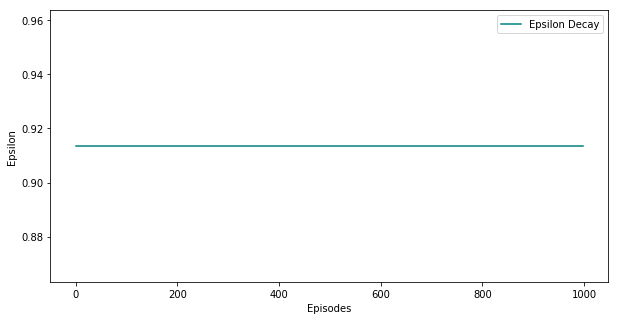

In [32]:
plt.plot(episodes[:999], epsilons, label= 'Epsilon Decay', c= 'teal')

plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.legend(loc=1)

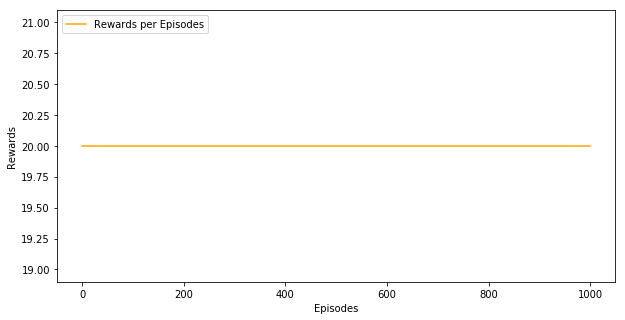

In [34]:
plt.plot(episodes, rewards, label= 'Rewards per Episodes', c= 'orange')

plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend(loc=2)